# Titanic Exploratory Data Analysis (EDA)
**Author:** Noah A. Velez

**Topic:** Exploratory Data Analysis

**Date:** 2023-05-18

---
The Kaggle's Titanic dataset is a well-known dataset used in machine learning and data science. It contains information about the passengers onboard the Titanic, which sank on its maiden voyage in 1912 after colliding with an iceberg. The goal of Kaggle's Titanic problem is to develop a predictive model that can accurately determine whether a passenger on the Titanic survived or not based on various attributes. This notebook will perform an exploratory data analysis on the Titanic dataset to identify the key patterns and trends for the development of the predictive model.

Here is a description of the columns/features in the Titanic dataset:
* PassengerId: An identifier for each passenger
* Survived: Indicates whether a passenger survived (1) or not (0)
* Pclass: The ticket class of the passenger (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
* Name: The name of the passenger
* Sex: The gender of the passenger (male or female)
* Age: The age of the passenger in years
* SibSp: The number of siblings/spouses aboard the Titanic
* Parch: The number of parents/children aboard the Titanic
* Ticket: The ticket number
* Fare: The passenger's fare (ticket price)
* Cabin: The cabin number
* Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Preparation

### Imports

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings

from IPython.display import clear_output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.display import display

warnings.filterwarnings("ignore")

### Read in datasets

In [2]:
test_df = pd.read_csv(r"C:\Users\Noaha\venv\Scripts\notebooks\Portfolio\Kaggle\Titanic\Data\test.csv")
train_df = pd.read_csv(r"C:\Users\Noaha\venv\Scripts\notebooks\Portfolio\Kaggle\Titanic\Data\train.csv")

The features in the Titanic dataset can be classified into different types based on their nature and characteristics.
* Target Variable
    * Survived: Indicates whether a passenger survived (0 = No, 1 = Yes).
* Numerical Features:
    * Age: Age of the passenger.
    * Fare: Fare paid by the passenger for the ticket.
    * SibSp: Number of siblings/spouses aboard the Titanic.
    * Parch: Number of parents/children aboard the Titanic.
    * PassengerId: Unique identifier for each passenger.
* Categorical Features:
    * Pclass: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
    * Sex: Gender of the passenger (male or female).
    * Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
* Ordinal Features:
    * Ticket: Ticket number.
    * Cabin: Cabin number.
* Text Features:
    * Name: Name of the passenger.

**Note:** The "Ticket" and "Cabin" features could be considered as a combination of numerical, categorical, and text features, depending on how they are processed and analyzed.

In [3]:
df = train_df

### View Data

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handle missing values
Identify missing values in the dataset and determine how to handle them.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Summary statistics 
Calculate descriptive statistics for numerical features using functions like describe() in pandas

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualize the Distribution of features
Analyze the distribution of numerical features using histograms, box plots, or density plots. This will provide insights into the spread and skewness of the data.

### Plot the Categorical Features
Create bar plots visualizing the distribution in the categorical features.

**Patterns & Insights**
* There were more men on board than women
* The majority of passengers embarked from Cherbourg, where as passsengers that embarked from Queenstown and Southampton made up ~33% of all on board
* 3rd Class ticket passengers made up ~50% of all passengers while 1st and 2nd class made up the remaining passengers
* The survival rate onboard is ~40%

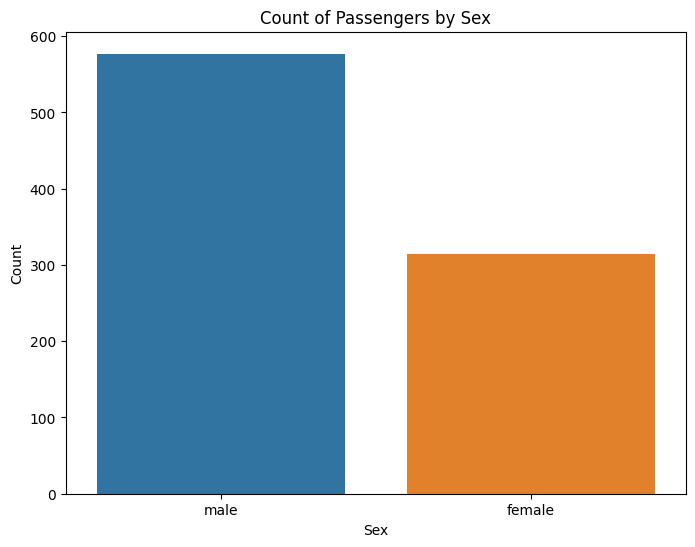

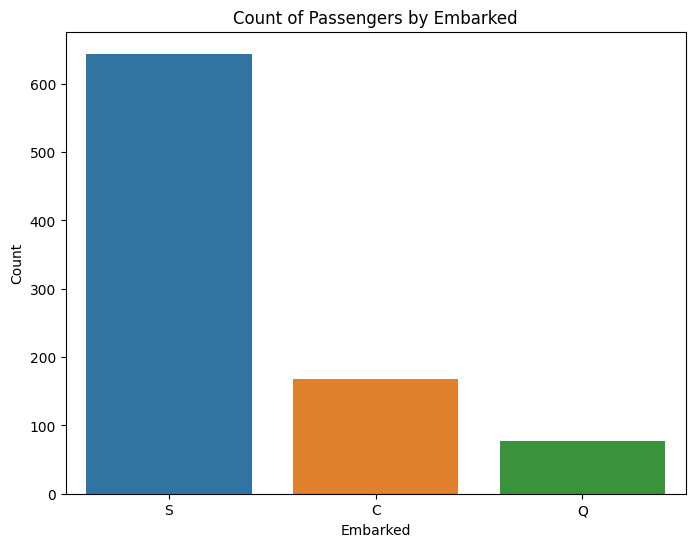

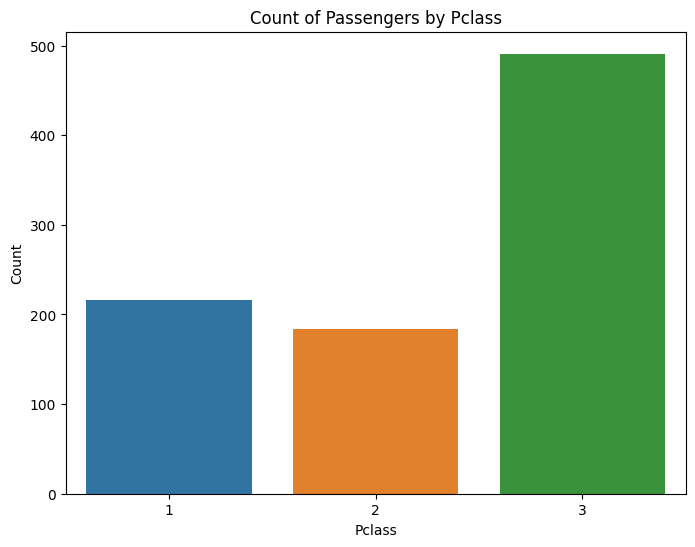

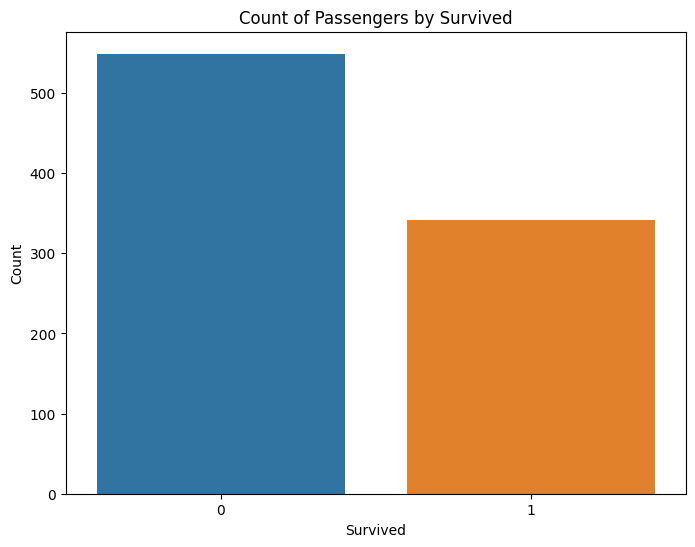

In [7]:
# Categorical features to plot
categorical_features = ['Sex', 'Embarked', 'Pclass', 'Survived']

# Plotting categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of Passengers by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
plt.show();

### Plot the Numeric Features
Create histograms and box plots for the numerical features in the Titanic dataset, providing insights into their distributions, ranges, and any potential outliers.

**Patterns & Insights**
* 

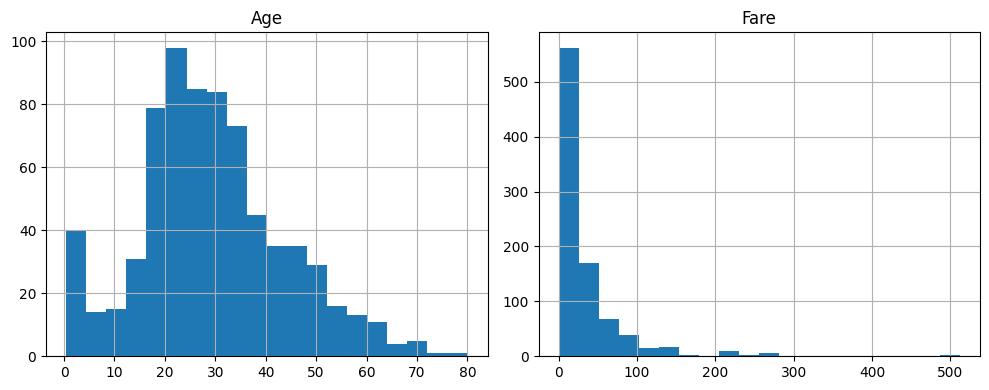

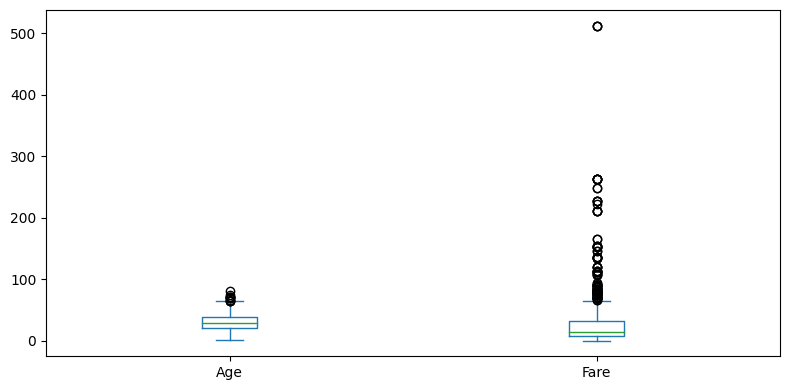

In [8]:
# Select only the numerical features
numerical_features = ['Age', 'Fare']

# Plot histograms for numerical features
df[numerical_features].hist(bins=20, figsize=(10, 4))
plt.tight_layout()
plt.show();

# Plot box plots for numerical features
df[numerical_features].plot(kind='box', figsize=(8, 4))
plt.tight_layout()
plt.show();

### Visualize the Text Features
#### Wordcloud
Create a wordcloud to visualize the most common words in the passenger names. This will provide sense of the prevalent names and potentially reveal any patterns or interesting insights.

**Patterns & Insights**
* Common names and titles can be mined from this data to better understand the relationship between name and survival

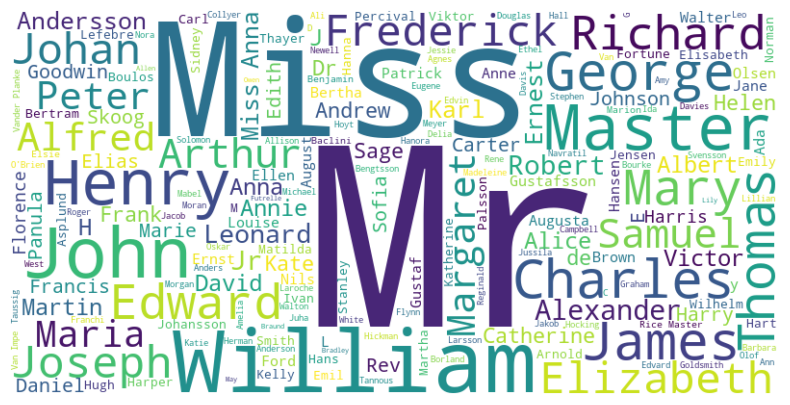

In [9]:
# Create a wordcloud of the passenger names
text = ' '.join(df['Name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

## Explore relationships
Investigate the relationships between features and the target variable (survived). Use visualizations such as bar charts or stacked bar plots to compare the survival rates based on different features like gender, ticket class, or embarkation point.

### Name Length Distribution
Visualize the distribution of name lengths to gain insights into the length variations in the passenger names. This can be done using a histogram or a kernel density plot. It can help identify any naming patterns or differences in name lengths between survivors and non-survivors.

**Patterns & Insights**
* Passengers whose names are longer than 32 characters were in the minority of passengers onboard but were more likely to survive 

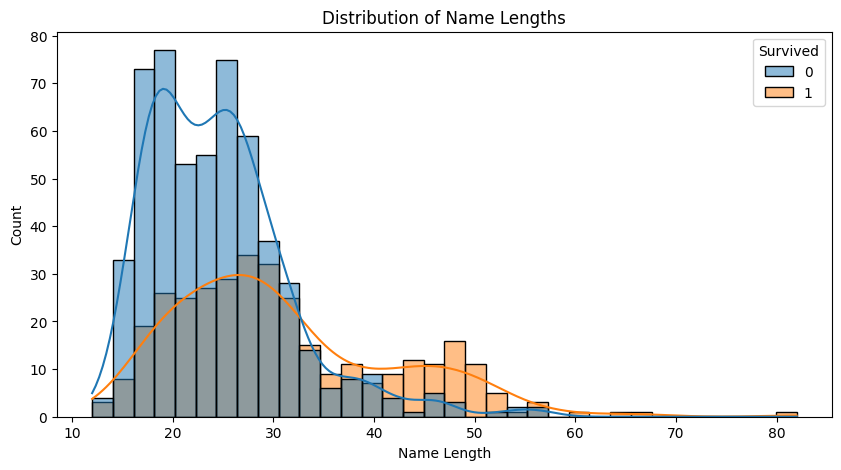

In [10]:
df['Name_Length'] = df['Name'].apply(len)

# Plot the distribution of name lengths
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Name_Length', hue='Survived', kde=True)
plt.title('Distribution of Name Lengths')
plt.xlabel('Name Length')
plt.ylabel('Count')
plt.show();

### Survival rates based on gender
Create a bar chart or a stacked bar plot to compare the survival rates of male and female passengers. This can be done by counting the number of survivors and non-survivors for each gender and representing them as bars.

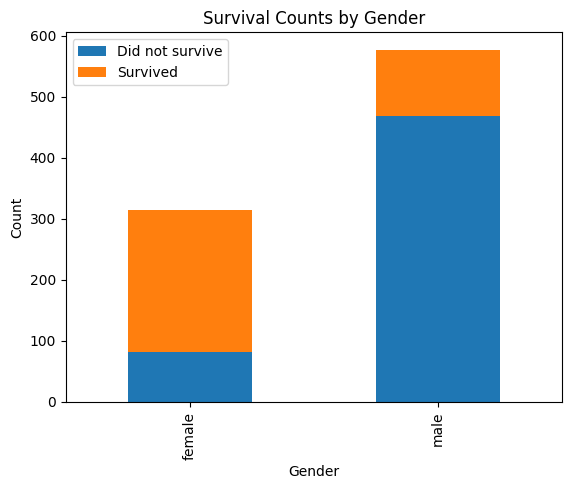

In [11]:
survival_counts = df.groupby('Sex')['Survived'].value_counts().unstack()

# Create a bar chart
fig, ax = plt.subplots()
survival_counts.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Survival Counts by Gender')

# Add legend
ax.legend(['Did not survive', 'Survived'])

# Show the plot
plt.show();

### Survival rates based on ticket class
Create a similar visualization to compare the survival rates of passengers from different ticket classes (e.g., first class, second class, third class).

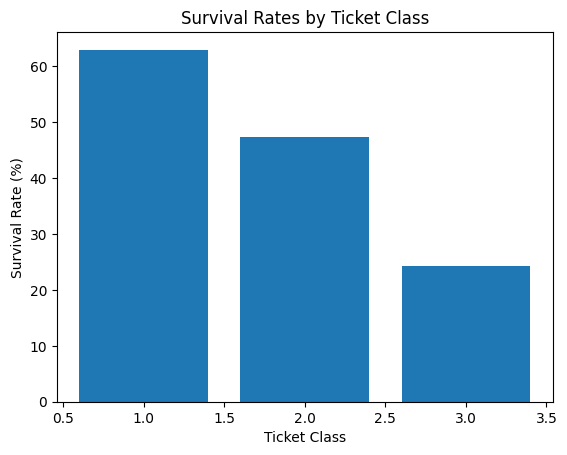

In [12]:
survival_rates = df.groupby('Pclass')['Survived'].mean() * 100

# Create a bar chart
plt.bar(survival_rates.index, survival_rates.values)

# Add labels and title
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rates by Ticket Class')

# Show the plot
plt.show();

### Survival rates by embarkation point
Visualize the survival rates based on the embarkation point (e.g., Southampton, Cherbourg, Queenstown).

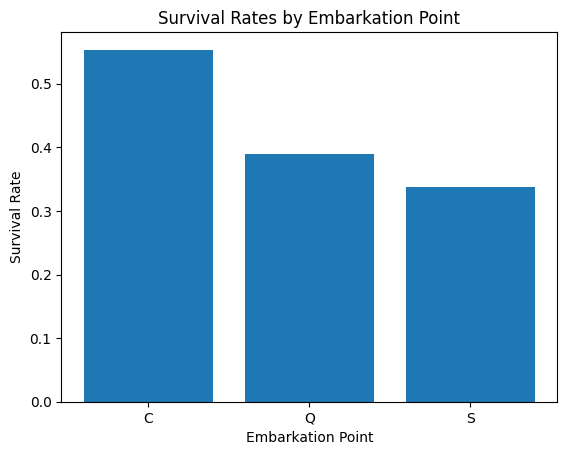

In [13]:
embarkation_survival_rates = df.groupby('Embarked')['Survived'].mean()

# Create a bar chart
plt.bar(embarkation_survival_rates.index, embarkation_survival_rates.values)
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Embarkation Point')

# Display the chart
plt.show();

### Age Distribution for Survivors and Non-Survivors
Investigate the relationships between survival and other features such as age, presence of family members (siblings, spouses, parents, children), or fare paid.

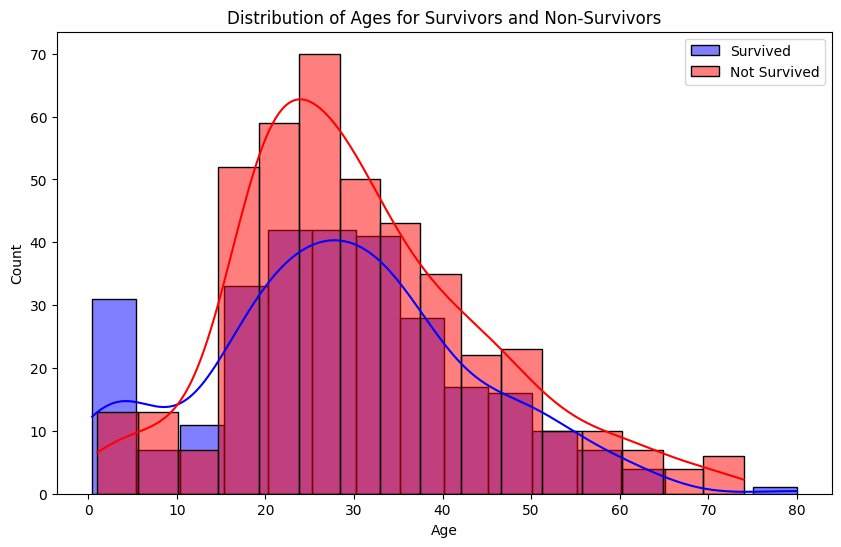

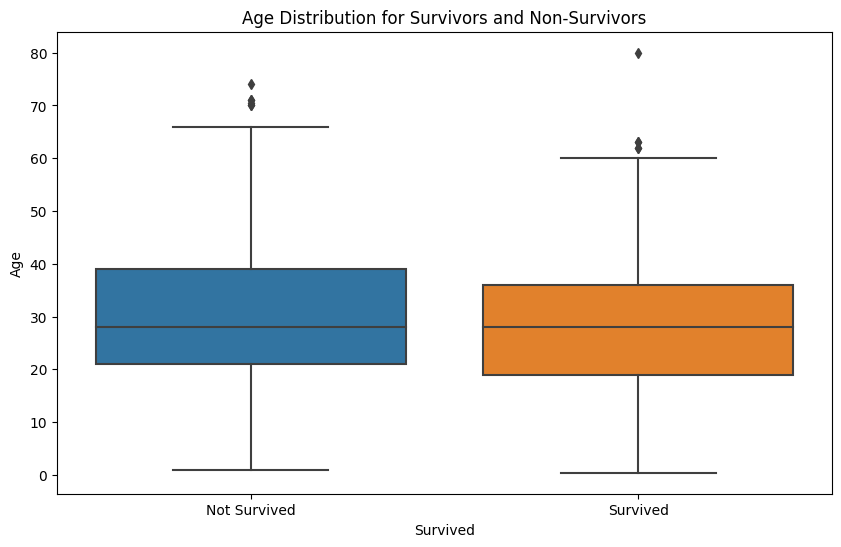

In [14]:
# Filter the data for survivors and non-survivors
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# Create a histogram of ages for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=survived, x='Age', color='blue', label='Survived', kde=True)
sns.histplot(data=not_survived, x='Age', color='red', label='Not Survived', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages for Survivors and Non-Survivors')
plt.legend()
plt.show()

# Create box plots of ages for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age Distribution for Survivors and Non-Survivors')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show();

### Surival base on presence of family members
Investigate the relationship between the presence of family members (siblings, spouses, parents, or children) and survival.
Create a bar chart or a stacked bar plot to compare the survival rates for passengers traveling alone versus those traveling with family members.

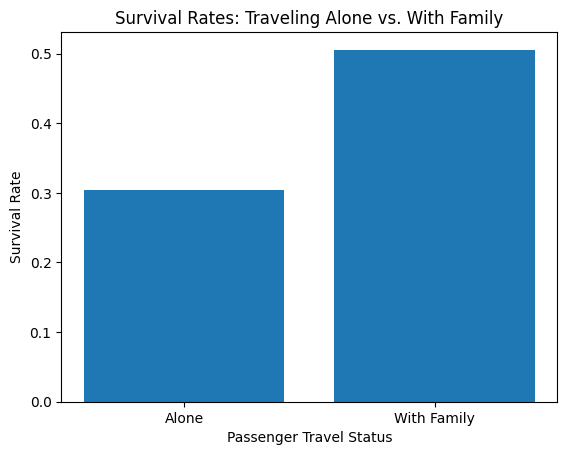

In [15]:
# Create a new column 'FamilySize' by adding the number of siblings/spouses and number of parents/children
df['FamilySize'] = df['SibSp'] + df['Parch']

# Map FamilySize to categories indicating if the passenger was traveling alone or with family
df['TravelAlone'] = df['FamilySize'].map(lambda x: 'Alone' if x == 0 else 'With Family')

# Calculate the survival rates for passengers traveling alone and with family
survival_rates = df.groupby('TravelAlone')['Survived'].mean()

# Create a bar chart or stacked bar plot to compare the survival rates
plt.bar(survival_rates.index, survival_rates)
plt.xlabel('Passenger Travel Status')
plt.ylabel('Survival Rate')
plt.title('Survival Rates: Traveling Alone vs. With Family')
plt.show();

### Survival based on fare paid
Analyze the relationship between the fare paid and survival. Create a histogram or box plot to compare the fare distributions between survivors and non-survivors.

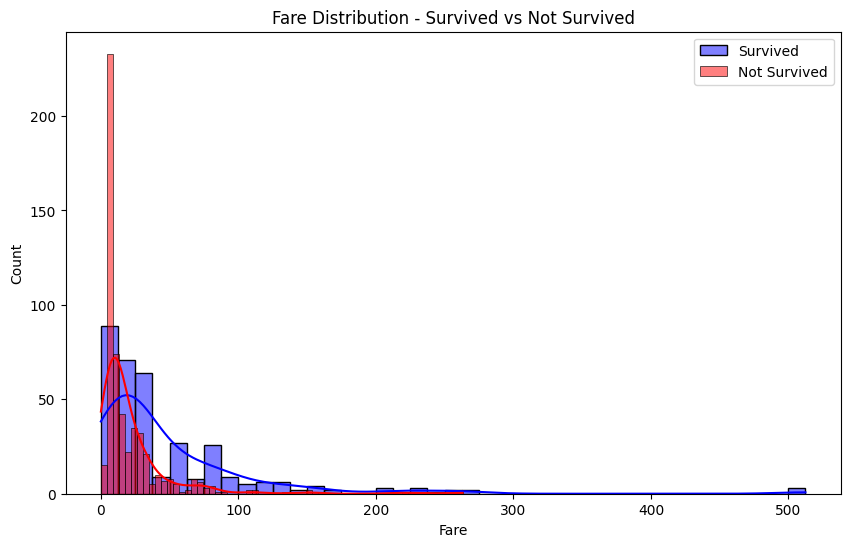

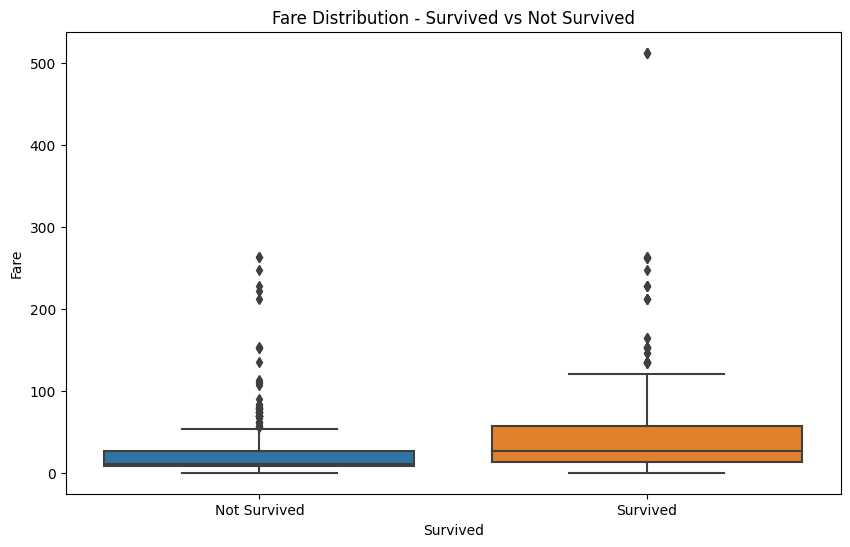

In [16]:
# Filter the data for survivors and non-survivors
survived = df[df['Survived'] == 1]
non_survived = df[df['Survived'] == 0]

# Create a histogram to compare fare distributions
plt.figure(figsize=(10, 6))
sns.histplot(survived['Fare'], label='Survived', color='blue', kde=True)
sns.histplot(non_survived['Fare'], label='Not Survived', color='red', kde=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution - Survived vs Not Survived')
plt.legend()
plt.show()

# Create a box plot to compare fare distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Survived'], y=df['Fare'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare Distribution - Survived vs Not Survived')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show();

### Survival Rate by Cabin
Analyze the relationship between the fare paid and survival. Create a bar plot to compare the fare distributions between survivors and non-survivors.

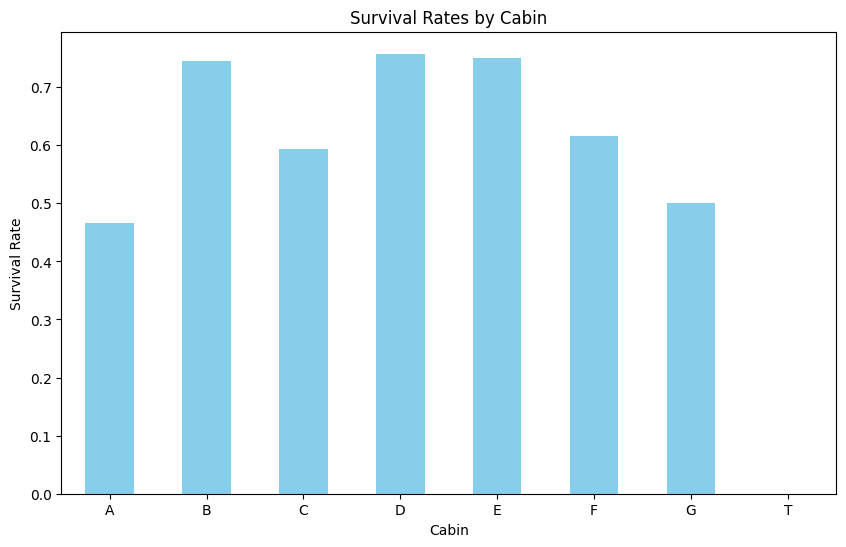

In [17]:
# Extract the cabin information from the 'Cabin' column
df['Cabin'] = df['Cabin'].str.extract(r'([A-Za-z])')

# Create a new DataFrame with the survival rates by cabin
cabin_survival = df.groupby('Cabin')['Survived'].mean()

# Plot the survival rates
plt.figure(figsize=(10, 6))
cabin_survival.plot(kind='bar', color='skyblue')
plt.title('Survival Rates by Cabin')
plt.xlabel('Cabin')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show();

## Patterns and Insights
Analyze the visualizations and identify any patterns or trends. 

---
Gender 
* There were more men onboard the Titanic than women
* Females had a higher survival rate compared to males

Ticket class 
* Class 3 & 2 tickets made up the majority of tickets with Class 1 being the least common ticket.
* Passengers in higher ticket classes (e.g., Class 1) had a better chance of survival compared to those in lower classes (e.g., Class 3).

Age
* Children 5 years old or younger had significantly higher survival rates compared people of other ages.

Family size
* Investigating the impact of family size on survival rates shows that people with family members onboard also had a higher survival rate.

Embarkation point
* Exploring survival rates by the embarkation point exposes differences in survival rates among different locations. This could indicate a correlation between the embarkation point and survival.

Fare 
* Passengers who paid higher fares do seem to have had a higher chance of survival.

Cabin or deck
* Passengers in cabins B, D, and E had the highest survival rates.